# Modelo de Intercambio Aleatorio de Activos (RAE)

## Sistema económico cerrado con conservación de dinero

El modelo utilizado es el de [Dragulescu & Yakovenko (2000)](https://doi.org/10.1007/s100510070114)

### Descripción del modelo

Los agentes económicos interaccionan por pares mediante transacciones monetarias. 

Solo se puede dar o recibir dinero en las transacciones.

Los agentes perdedores se etiquetan con el indice $i$ mientras que los ganadores con el indice $j$.

Sean $m$ y $m'$ la cantidad de dinero que posee un agente, antes y después de la transacción la cual se da según:

$$ m_i \rightarrow m'_i = m_i - \Delta m$$
$$ m_j \rightarrow m'_j = m_j + \Delta m$$

donde $\Delta m$ es la cantidad de dinero que el agente perdedor le transfirió al agente ganador después de la transacción.


Algunos supuestos:
- El dinero se conserva, global y localmente, $m_i + m_j = m'_i + m'_j $.
- El balance de los ganadores no puede ser negativo, $m_j  \ge 0 \ \forall j $.
- Una transacción se da solamente cuando el agente "perdedor" tiene suficiente dinero para pagar, $m_i  \ge \Delta m$.
- No hay crédito ni deuda.


La mecánica estadística predice que el sistema económico alcanzara la distribución estacionaria de Boltzmann-Gibbs,

$$ P(m) = \frac{1}{T} e^{-m/T} $$

donde 

$$ T = \langle m \rangle = \frac{M}{N} $$

es la _"Temperatura del dinero"_, y es igual a la cantidad promedio de dinero. $M$ es la cantidad total de dinero en el sistema, y $N$ es el numero total de agentes en el sistema. 


## Cómo se realizan las simulaciones

Las simulaciones se realizan en el siguiente orden:

- Inicialmente todos los agentes tienen la misma cantidad de dinero.
- Se elige un par $(i, j)$ de agentes al azar, y e realiza la transacción, es decir, se transfiere la cantidad $\Delta m$.
- Se repite el paso anterior varias veces.



En este trabajo se realizan las simulaciones con cada una de las siguientes reglas de intercambio:

- **Regla 1**: Intercambio de una pequeña cantidad constante de dinero, $\Delta m = 1$.
- **Regla 2**: Intercambio de una fracción aleatoria $0 \le \nu \le 1$ del dinero promedio del par, $\Delta m = \nu \left( m_i + m_j \right)/2$
- **Regla 3**: Intercambio de una fracción aleatoria $0 \le \nu \le 1$ del dinero promedio del sistema,  $\Delta m = \nu T$

Observese que estas reglas tienen simetría de inversión temporal, ya que son invariantes ante una permutación de los índices $i$ y $j$.

### Paquetes a utilizar 

In [2]:
using Random, Distributions, CairoMakie, LaTeXStrings

### Condiciones iniciales

Los parámetros para las simulaciones son: $N = 5 \times 10^{5}$ y $M = 5 \times 10^{6}$. Por lo tanto, al principio de las simulaciones, los agentes contarán con la misma cantidad de dinero $\left\langle m \right\rangle = \frac{M}{N} = 10$.

In [2]:
N_exp = 5
N = 5 * 10^N_exp     

M_exp = 6
M = 5 * 10^M_exp

T = M/N 

10.0

#### Reglas de intercambio 

In [3]:
exchange_rules = ["small_constant", "random_pair_average", "random_system_average"]

3-element Vector{String}:
 "small_constant"
 "random_pair_average"
 "random_system_average"

In [1]:
mutable struct Agent
  money::Float64
end

In [18]:
p = Agent(3)

Agent(3.0)

In [19]:
p.money

3.0

In [3]:
function simulation(N_exp, M_exp, rule, T_exp)
  N = 5 * 10^N_exp  # numero de agentes   
  M = 5 * 10^M_exp # Dinero total en el sistema 
  M_prom = M/N # temperatura del dinero
  T = 2 * 10^T_exp 
	
  Agentes = [Agent(M_prom) for i in 1:N]
  exchange_rules = ["small_constant", "random_pair_average", "random_system_average"]
  transaction_type = exchange_rules[rule]
  system_avg = M_prom
  for t in 1:T
    agent_i = rand(1:N)
    agent_j = rand(1:N)

    coin_flit = rand(1:2)
    loser_index = [agent_i, agent_j][coin_flit]
    winner_index = [agent_i, agent_j][2-coin_flit+1]

    delta_m = 0.0
    
    if transaction_type == "small_constant"
    delta_m += 1.0
    elseif transaction_type == "random_pair_average"
    avg = (Agentes[loser_index].money + Agentes[winner_index].money) / 2
    delta_m += rand(Uniform()) * avg
    elseif transaction_type == "random_system_average"
    delta_m += rand(Uniform()) * system_avg
    elseif transaction_type == "proportional"
    delta_m += 0.5 * lista.money
    end
    delta_m

    if Agentes[loser_index].money >= delta_m
      Agentes[loser_index].money -= delta_m
      Agentes[winner_index].money += delta_m
    end
  end

  wealth = [0.0 for i in 1:N]
  for i in 1:N
    wealth[i] = Agentes[i].money
  end

return wealth
end

simulation (generic function with 1 method)

In [31]:
sim = simulation(5, 6, 2, 7)

500000-element Vector{Float64}:
 12.344695225848527
  8.322462269383553
  5.060993872214072
  3.2080725070189766
 18.466372330820114
  6.59669510806282
  4.240593850904726
  2.550826435304911
 13.663148576181657
  1.3759236794159735
  ⋮
  6.198464511777088
  3.332576198940377
  0.5846202525997595
 12.698398937518888
  5.498957133963975
 38.512818833457
 12.466881399006745
  2.7430697594517843
  4.246762047067751

In [32]:
length(sim)

500000

In [33]:
max_val_sim = maximum(sim)
max_val_sim_int = Int(floor(max_val_sim))
m_values = range(0, stop = max_val_sim, length=max_val_sim_int)
P_values = length(sim) * (1 / 10) * exp.(-m_values / 10)  

134-element Vector{Float64}:
 50000.0
 45205.55528811754
 40870.844578141034
 36951.784484984266
 33408.5187306112
 30205.0128114151
 27308.687532494474
 24690.087681922105
 22322.582475471987
 20182.09472537025
     ⋮
     0.16853709453540275
     0.15237625890237697
     0.13776506792815818
     0.12455492789995237
     0.11261149359177591
     0.10181330199281032
     0.09205053704603598
     0.08322391283470976
     0.07524366385885901

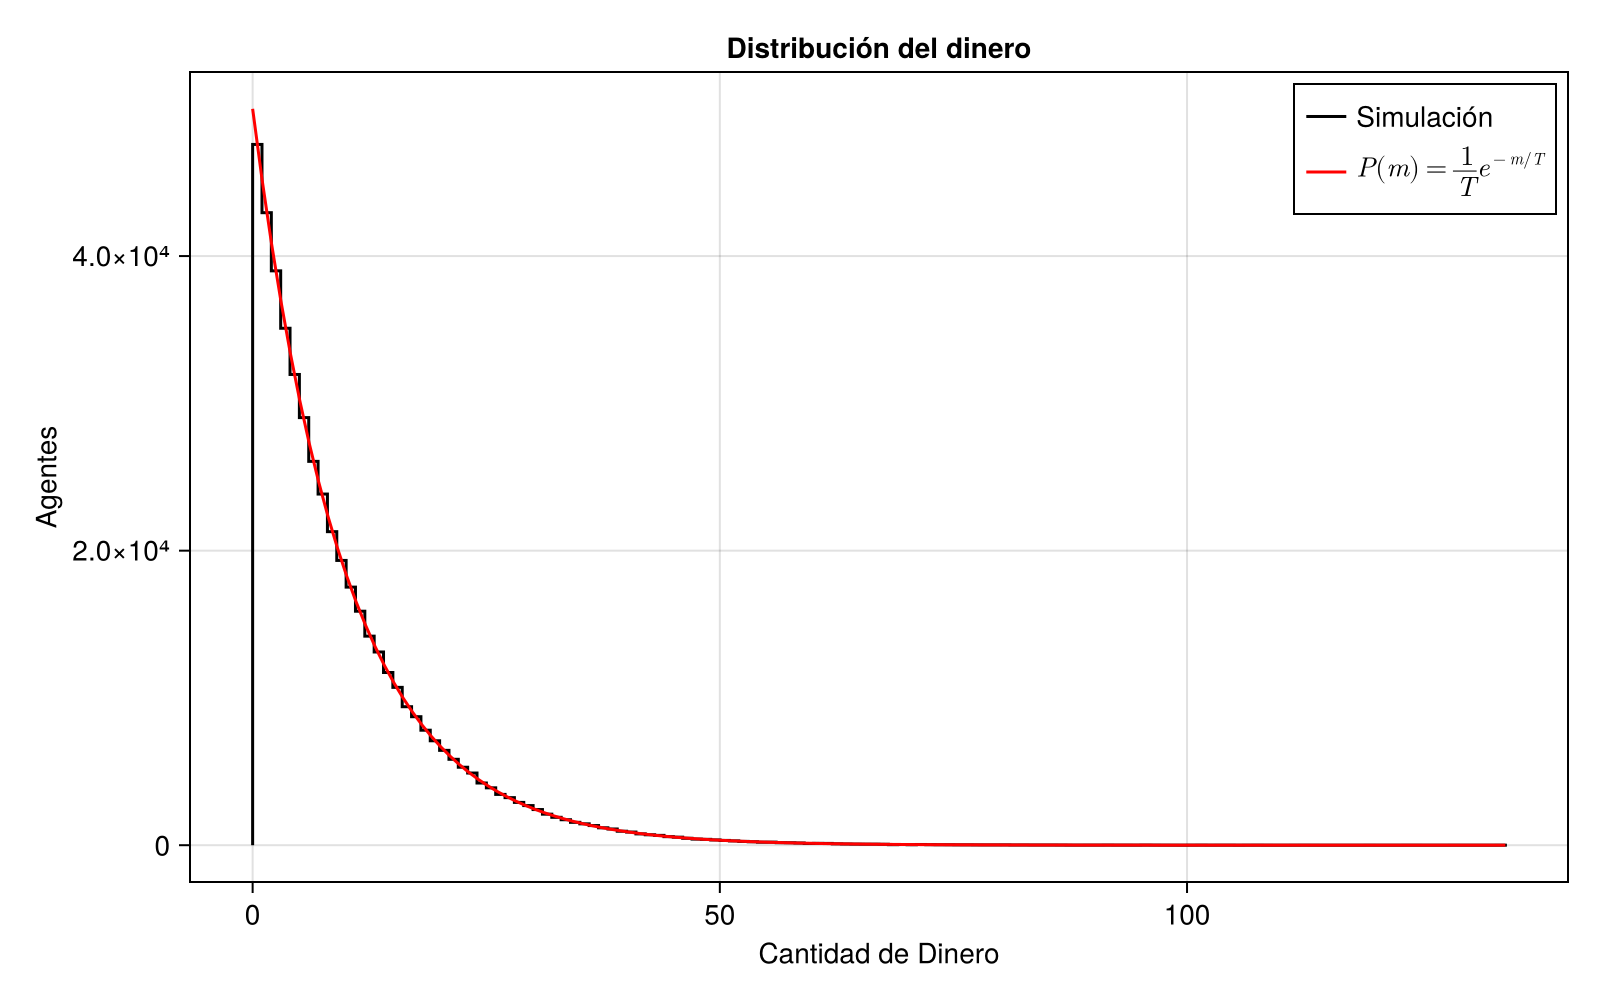

In [34]:
f = Figure(size = (800, 500))
ax = Axis(f[1, 1],
	title = "Distribución del dinero",
    xlabel = "Cantidad de Dinero",
    ylabel = "Agentes",
	)
stephist!(ax, sim, bins = max_val_sim_int, color = :black, label = "Simulación")
lines!(m_values, P_values, color=:red, label = L"P(m)=\frac{1}{T}e^{-m/T}")
axislegend(position=:rt)
f

## Modelo más realista 

### Descripción del modelo

Para que el modelo sea un poco más realista, introducimos empresas. Un agente a la vez se convierte en una empresa. La empresa toma prestado capital $K$ de otro agente y lo devuelve con un interés $rK$, contrata $L$ agentes y les paga un salario $W$, fabrica $q$ artículos de un producto y los vende a $q$ agentes a un precio $p$. Todos estos agentes son seleccionados aleatoriamente. La empresa recibe la ganancia
$$
\pi = pq - LW - rK
$$

El resultado neto es un intercambio de dinero entre muchos cuerpos que aún satisface la ley de conservación.

Los parámetros del modelo que maximizan la ganancia se obtienen de la siguiente forma:

1) Se establece la curva de oferta-demanda agregada, $p\left( q \right) = V/q^{\eta}$, donde $q$ es la cantidad de productos que la gente compraría a un precio $p$. $V = 100$ y $\eta = 1/2$ son constantes.
2) Se establece la función de producción de la firma, $Q\left( L,K \right) = L^{\beta}K^{1-\beta}$, con $\beta = 8/10$.
3) Se sustituyen las expresiones de los pasos anteriores en la ecuación de la ganacia, y se obtiene la ecuación $F\left( L,K \right) = V Q^{1-\eta} - LW - rK = V \left(L^{\beta}K^{1-\beta}\right)^{1-\eta} - LW - rK$
4) Se resuelve $\nabla F\left( L,K \right) = 0$ para maximizar la ganancia. La solución es 
$$
L_{critico} = \left( \frac{V \beta\left( 1-\eta \right)}{W} \right)^{1/\eta}\left( \frac{W \left( 1-\beta \right)}{r\beta} \right)^{\left(1-\beta\right)\left(1-\eta\right)/\eta}\\
K_{critico} = \frac{1-\beta}{\beta}\cdot\frac{W}{r}L_{critico}
$$

Una vez se establecen los valores de los parámetros $W$ y $r$, se pueden encontrar los valores de $L_{critico}$, $K_{critico}$, $Q_{c} = Q \left( L_{critico},K_{critico}  \right)$, $R_{c} = R \left( Q_c \right)$ y $F_{max}$, en ese orden. Por ejemplo, si $W = 10$ y $r=0.15$, entonces
$$
L_{critico} = \simeq 28\\
K_{critico} = 468.1\\
Q_{c} \simeq 49\\
R_{c} = 14.242\\
F_{max} = 351.075
$$

Es decir, con aquellos valores de salario y tasa de interés, la empresa obtendrá una ganancia máxima de 351.1$ si contrata a 28 trabajadores, toma prestado 468.1$ de capital, fabrica 49 artículos de su producto y los vende a 14.2$ cada uno.